<a href="https://colab.research.google.com/github/leticiaram/Modelos_Estocasticos_2023/blob/main/Codigo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulación de Proceso Poisson

In [ ]:
# El siguiente código está basado en el código de  @sachinsdate
# https://gist.github.com/sachinsdate/d98b3a923aaa9055f19e4b5e820e1a14
import random
import math
import statistics
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def sim_Poisson_Process(par_lambda, num_events):
  event_num = []
  inter_event_times = []
  event_times = []
  event_time = 0

  for i in range(num_events):
	  event_num.append(i)
	  #Get a random probability value from the uniform distribution's PDF
	  unif = random.random()

	  #Generate the inter-event time from the exponential distribution's CDF using the Inverse-CDF technique
	  inter_event_time = -math.log(1.0 - unif) / par_lambda
	  inter_event_times.append(inter_event_time)

	  #Add the inter-event time to the running sum to get the next absolute event time
	  event_time = event_time + inter_event_time
	  event_times.append(event_time)

  return(event_num, inter_event_times, event_times)

In [ ]:
random.seed(10)
num_events =10
event_num, inter_event_times, event_times = sim_Poisson_Process(par_lambda=20, num_events=num_events)

In [ ]:
event_times

[0.04236186249169292,
 0.0703704518995106,
 0.11351876898716647,
 0.12505854615959336,
 0.20897684921679915,
 0.2957237520429392,
 0.34871341185559857,
 0.35744474715874924,
 0.39421297953619905,
 0.4140709254187563]

### Conteos $\{N(t),t\in[0,t]\}$

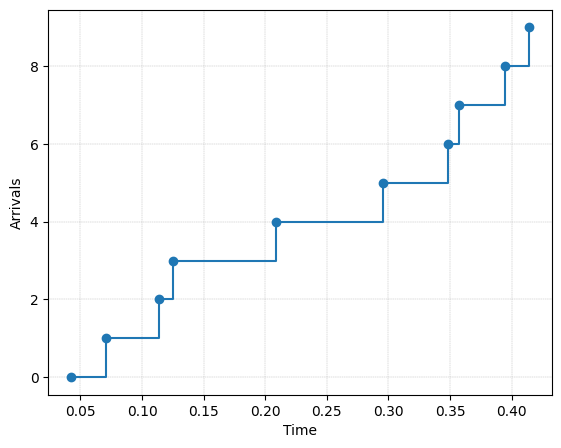

In [ ]:
plt.step(np.array(event_times, dtype=np.float32), np.array(event_num, dtype=np.float32), where='post')
plt.plot(np.array(event_times, dtype=np.float32), np.array(event_num, dtype=np.float32), 'C0o', alpha=1)
plt.grid(linestyle = '--', linewidth = 0.3)
plt.xlabel('Time')
plt.ylabel('Arrivals')
plt.show()

## Tiempos de espera $\{W_i\}$

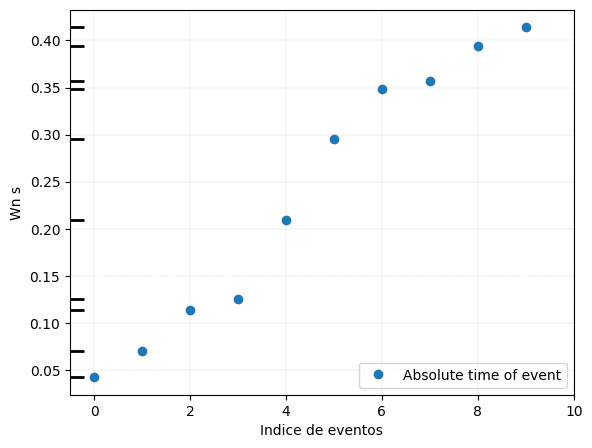

In [ ]:
fig, ax = plt.subplots(1, 1)
#plot the absolute event times
#fig = plt.figure()
#fig.suptitle('Absolute times of consecutive events in a simulated Poisson process')
plot, = plt.plot(event_num, event_times, 'o', label='Absolute time of event')
#ax.hlines(event_times, 0, event_num, colors='b', lw=3, alpha=0.5)
ax.hlines(event_times, -1, -0.2, colors='0', lw=2, alpha=1)
plt.legend(handles=[plot], loc='lower right')
plt.grid(linestyle = '--', linewidth = 0.2)
plt.xlim([-0.5, num_events])
plt.xlabel('Indice de eventos')
plt.ylabel('Wn s')
plt.show()


## Tiempos entre eventos $\{T_i\}$

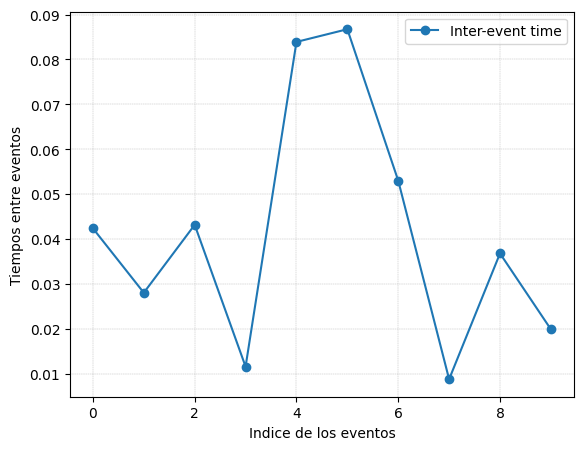

In [ ]:
#plot the inter-event times
fig = plt.figure()
#fig.suptitle('Times between consecutive events in a simulated Poisson process')
plot, = plt.plot(event_num, inter_event_times, 'o-', label='Inter-event time')
plt.grid(linestyle = '--', linewidth = 0.3)
plt.legend(handles=[plot])
plt.xlabel('Indice de los eventos')
plt.ylabel('Tiempos entre eventos')
plt.show()

# Distribución de tiempos para el m-ésimo arrivo

## Ejemplo para el 5to arrivo

In [ ]:
random.seed(10)
tiempo_5to_arrivo = []
for i in range(1000):
  event_num, inter_event_times, event_times = sim_Poisson_Process(par_lambda=2, num_events=5)
  tiempo_5to_arrivo.append(event_times[4])

In [ ]:
x = np.linspace(0.001, 7, 100)
from scipy.stats import gamma

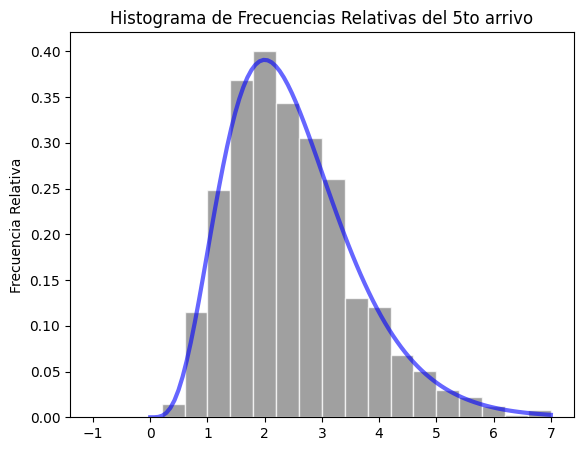

In [ ]:
# Graficar el histograma y fdp
plt.plot(x, gamma.pdf(x,a=5,scale=1/2),'b-', lw=3, alpha=0.6, label='norm pdf')
plt.hist(tiempo_5to_arrivo, bins=20, range=(-1, 7), density=True, alpha=0.75, color='grey', edgecolor='white')
plt.xlabel('')
plt.ylabel('Frecuencia Relativa')
plt.title('Histograma de Frecuencias Relativas del 5to arrivo')
#plt.grid(True)
plt.show()

# Proceso Poisson con dos tipos de eventos


In [ ]:
def sim_2Poisson_Process(par_lambda1,par_lambda2, num_events):
  event_num = []
  tipo = []
  inter_event_times = []
  event_times = []
  event_time = 0

  for i in range(num_events):
	  event_num.append(i)
	  #Get a random probability value from the uniform distribution's PDF
	  unif_0 = random.random()

	  #Generate the inter-event time from the exponential lambda1+lambda2, using the Inverse-CDF technique
	  inter_event_time = -math.log(1.0 - unif_0) / (par_lambda1 + par_lambda2)
	  inter_event_times.append(inter_event_time)

	  #Ahora identificamos que tipo de llegada fue la que tiene
	  unif_1 = random.random()
	  if unif_1 < par_lambda1/(par_lambda1+par_lambda2):
	    tipo.append(1)
	  else:
	    tipo.append(2)

	  #Add the inter-event time to the running sum to get the next absolute event time
	  event_time = event_time + inter_event_time
	  event_times.append(event_time)

  return(event_num, tipo, inter_event_times, event_times)

In [ ]:
random.seed(10)
num_events =50
event_num, tipo, inter_event_times, event_times = sim_2Poisson_Process(par_lambda1 = 2,par_lambda2 = 4, num_events = num_events)

In [ ]:
import pandas as pd
pd.Series(tipo).value_counts()

2    30
1    20
dtype: int64

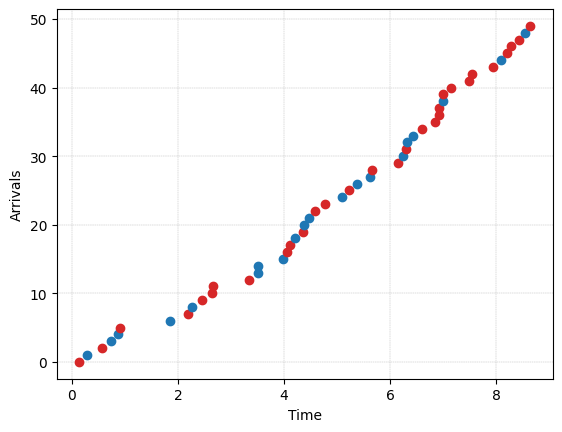

In [ ]:
#plt.step(np.array(event_times, dtype=np.float32), np.array(event_num, dtype=np.float32), where='post')

for i in range(len(event_times)):
  if tipo[i]==1:
    plt.plot(np.array(event_times, dtype=np.float32)[i], np.array(event_num, dtype=np.float32)[i], 'C0o', alpha=1)
  else:
    plt.plot(np.array(event_times, dtype=np.float32)[i], np.array(event_num, dtype=np.float32)[i], 'C3o', alpha=1)

plt.grid(linestyle = '--', linewidth = 0.3)
plt.xlabel('Time')
plt.ylabel('Arrivals')
plt.show()

# Algoritmo Gillespie

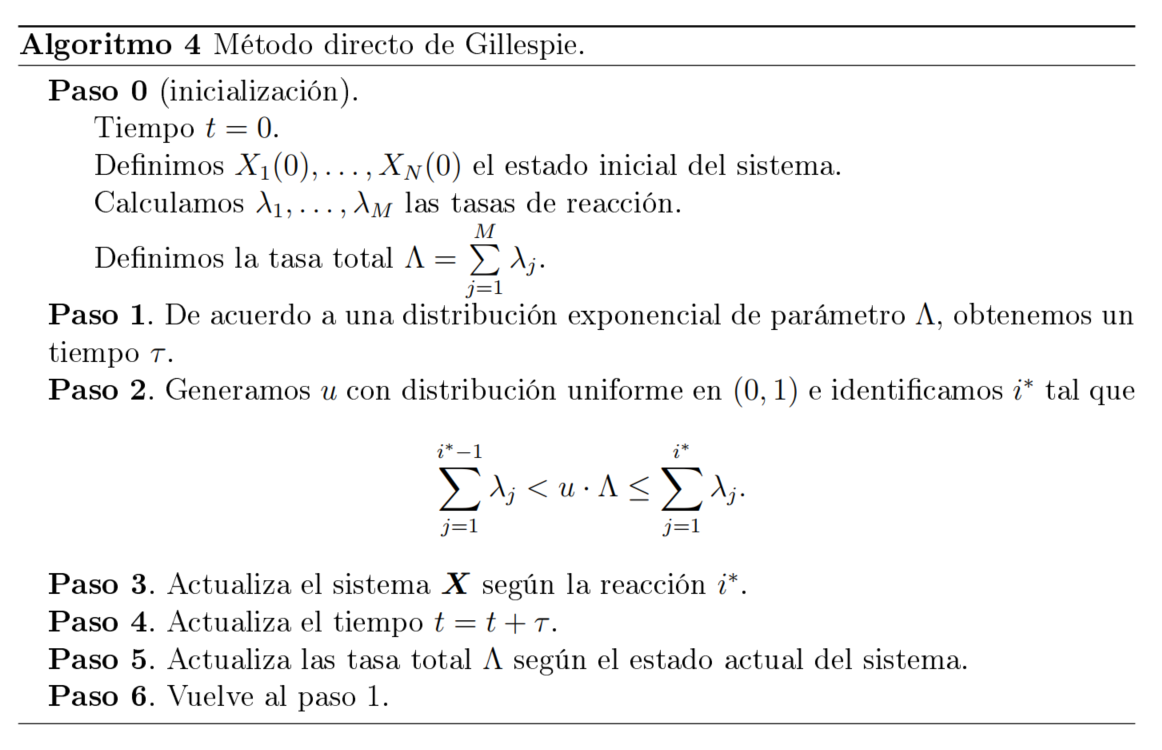

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import odeint

In [ ]:
def Gillepie(S, I, R, tend, beta, gamma):
  t = [0]
  while t[-1] < tend and (S[-1] + I[-1] >= 1):

    N = S[-1] + I[-1] + R[-1]
    props = [beta*I[-1]*S[-1]/N, gamma*I[-1]]
    prop_sum = sum(props)
    tau = np.random.exponential(scale=1/prop_sum)
    t.append(t[-1]+tau)
    rand = random.uniform(0,1)

    # Susceptible becomes Infected
    if rand * prop_sum <= props[0]:
            S.append(S[-1] - 1)
            I.append(I[-1] + 1)
            R.append(R[-1])

    # Infected becomes Recovered
    # elif rand * prop_sum > props[0] and rand * prop_sum <= sum(props[:2]):
    else:
            S.append(S[-1])
            I.append(I[-1] - 1)
            R.append(R[-1] + 1)
  return(t, S, I, R)

In [ ]:
S = [100]
I = [1]
R = [0]
tend = 500
beta = 0.04
gamma = 0.01

random.seed(10)
tr, Sr, Ir, Rr = Gillepie(S, I, R, tend, beta, gamma)

Text(0.5, 0, 'Time')

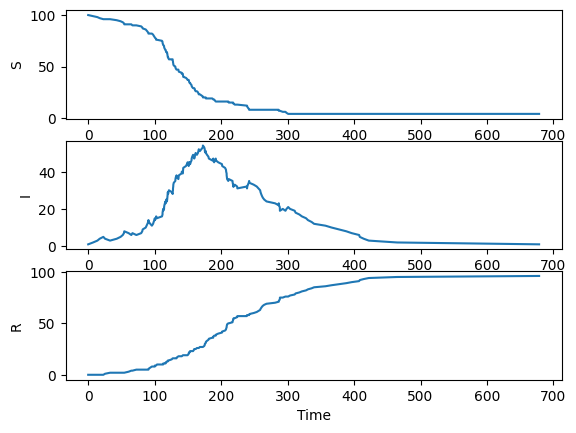

In [ ]:
f,(ax1,ax2,ax3) = plt.subplots(3)

line1, = ax1.plot(tr,Sr) # S
line2, = ax2.plot(tr,Ir) # I
line3, = ax3.plot(tr,Rr) # R

ax1.set_ylabel("S")
ax2.set_ylabel("I")
ax3.set_ylabel("R")
ax3.set_xlabel("Time")

# plt.show()

In [ ]:
t = np.linspace(0,tend, num=1000)
params = [beta,gamma]
y0 = [100, 1, 0]

def odesim(variables, t, params):
    S = variables[0]
    I = variables[1]
    R = variables[2]

    N = S + I + R

    beta = params[0]
    gamma = params[1]

    dSdt = -beta * I * S / N
    dIdt = beta * I * S / N - gamma * I
    dRdt = gamma * I

    return([dSdt, dIdt, dRdt])

y = odeint(odesim, y0, t, args=(params,))


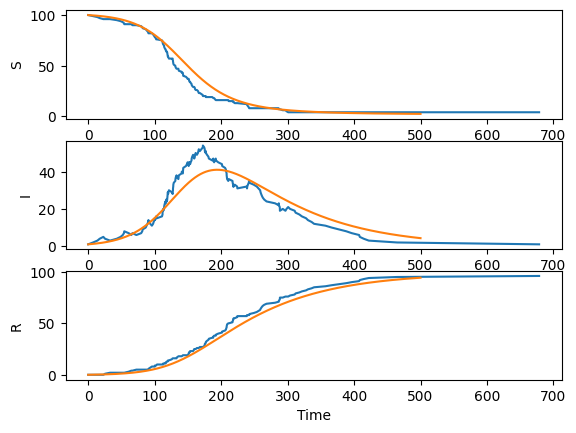

In [ ]:
f,(ax1,ax2,ax3) = plt.subplots(3)

line1, = ax1.plot(tr,Sr) # S
line2, = ax2.plot(tr,Ir) # I
line3, = ax3.plot(tr,Rr) # R

ax1.set_ylabel("S")
ax2.set_ylabel("I")
ax3.set_ylabel("R")
ax3.set_xlabel("Time")

line1, = ax1.plot(t,y[:,0]) # S
line2, = ax2.plot(t,y[:,1]) # I
line3, = ax3.plot(t,y[:,2]) # R

plt.show()

In [ ]:
S = [100]
I = [1]
R = [0]
tend = 500
beta = 0.04
gamma = 0.01
random.seed(5)
tr2, Sr2, Ir2, Rr2 = Gillepie(S, I, R, tend, beta, gamma)

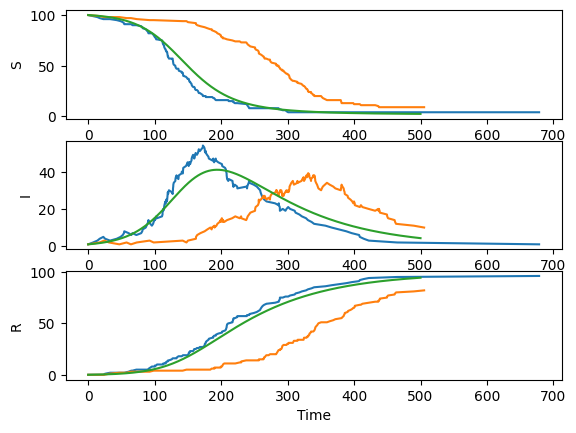

In [ ]:
f,(ax1,ax2,ax3) = plt.subplots(3)

line1, = ax1.plot(tr,Sr) # S
line2, = ax2.plot(tr,Ir) # I
line3, = ax3.plot(tr,Rr) # R

ax1.set_ylabel("S")
ax2.set_ylabel("I")
ax3.set_ylabel("R")
ax3.set_xlabel("Time")

line1, = ax1.plot(tr2,Sr2) # S
line2, = ax2.plot(tr2,Ir2) # I
line3, = ax3.plot(tr2,Rr2) # R

line1, = ax1.plot(t,y[:,0]) # S
line2, = ax2.plot(t,y[:,1]) # I
line3, = ax3.plot(t,y[:,2]) # R

plt.show()

# Forma alternativa de simular un proceso Poisson


1. Establecer el intervalo de tiempo a simular (0,t]
2. Simular $n$ de $X(t) \sim $Pois($ \lambda t$)
3. Simular $n$ vaiid Unif$(0,t)$ $U_1,\ldots,U_n$
4. Ordenar las vas y establecer $W_i=U_{(n)}$


In [ ]:
import random
from scipy.stats import uniform
from scipy.stats import poisson
import math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
t = 15
par_lambda = 4

In [ ]:
random.seed(5)
pois = poisson.rvs(mu=par_lambda*t, size=1)
pois

array([56])

In [ ]:
 unifs = uniform.rvs(scale=t,size=pois)
 type(unifs)

numpy.ndarray

In [ ]:
unifs_s=np.sort(unifs)

In [ ]:
unifs_s

array([ 0.47015371,  0.51320474,  0.97150279,  1.02092877,  1.06434445,
        1.91001003,  3.68559437,  3.68713652,  3.84983386,  3.90920287,
        3.95687098,  3.96119425,  4.20215406,  4.45523987,  4.65829851,
        4.6700342 ,  5.12171354,  5.17000187,  5.27945152,  5.44283879,
        6.04987615,  6.05536412,  6.33291236,  6.35798338,  6.85803973,
        7.03224551,  7.07289618,  7.10763919,  7.36674867,  7.56421229,
        8.19391908,  8.36077701,  9.06664264,  9.09121441,  9.14104628,
        9.20073531,  9.49934817,  9.58486896,  9.64284932,  9.74059289,
       10.20336414, 10.38153006, 10.41195181, 10.50637226, 10.5612737 ,
       11.13683515, 11.22664281, 11.23758481, 11.83625298, 13.95549172,
       14.43035571, 14.57916857, 14.67787297, 14.7941486 , 14.91429998,
       14.96837972])

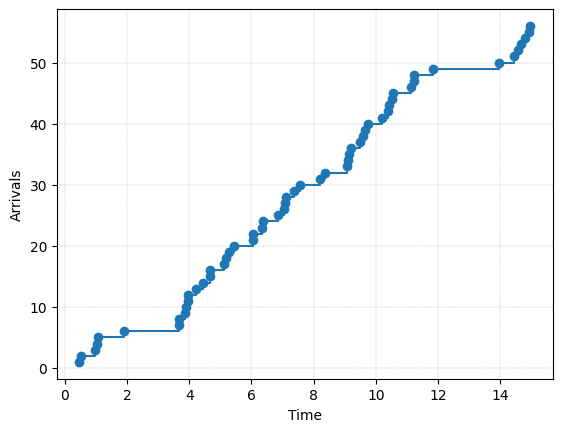

In [ ]:
plt.step(unifs_s, np.arange(len(unifs))+1, where='post')
plt.plot(unifs_s, np.arange(len(unifs))+1, 'C0o', alpha=1)
plt.grid(linestyle = '--', linewidth = 0.3)
plt.xlabel('Time')
plt.ylabel('Arrivals')
plt.show()

# M/GI/$\infty$

In [ ]:
import random
from scipy.stats import uniform
from scipy.stats import poisson
import math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
par_lambda = 4
t = 500

In [ ]:
random.seed(10)
pois = poisson.rvs(mu = par_lambda*t, size = 1)
unifs = uniform.rvs(scale = t,size = pois)
llegadas = np.sort(unifs)

## Tiempo de servicio fijo

In [ ]:
S = 2
salidas = llegadas + S

In [ ]:
ns=len(salidas)

In [ ]:
llegadas_llav = np.hstack((llegadas.reshape(ns,1), np.full((ns,1),fill_value=1,dtype =float)))

In [ ]:
salidas_llav = np.hstack((salidas.reshape(ns,1), np.full((ns,1),fill_value=-1,dtype =float)))

In [ ]:
all_llav = np.concatenate((llegadas_llav,salidas_llav),axis=0)

In [ ]:
all_llav = all_llav[all_llav[:, 0].argsort()]

In [ ]:
all_llav[0:10,:]

array([[ 0.04702303,  1.        ],
       [ 0.36659018,  1.        ],
       [ 1.10759789,  1.        ],
       [ 1.13656793,  1.        ],
       [ 1.95690446,  1.        ],
       [ 2.04702303, -1.        ],
       [ 2.25208255,  1.        ],
       [ 2.36659018, -1.        ],
       [ 2.53440503,  1.        ],
       [ 2.57776251,  1.        ]])

In [ ]:
all_llav_cut = all_llav[all_llav[:,0]<=t,:]

In [ ]:
Yt = np.cumsum(all_llav_cut[:,1])

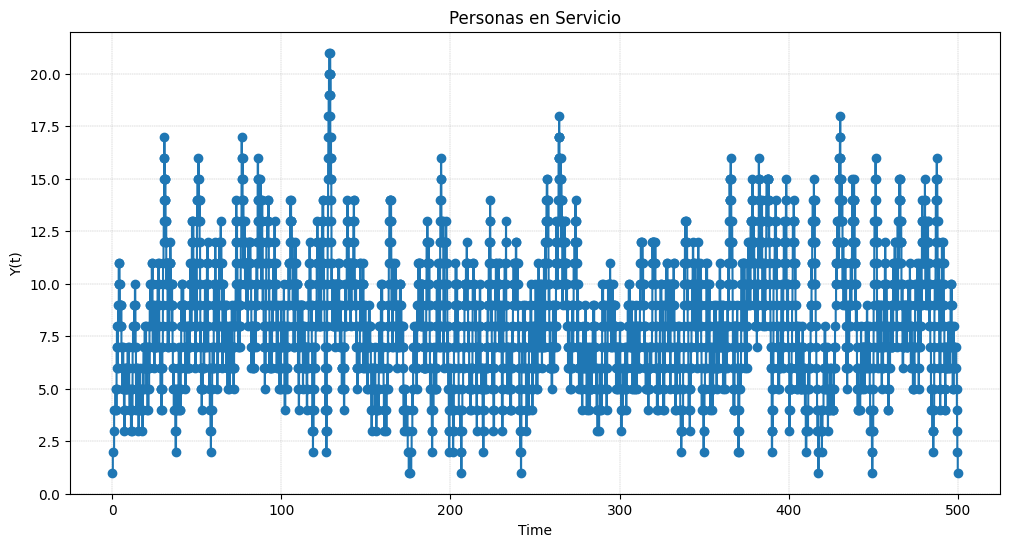

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.step(all_llav_cut[:,0], Yt, where='post')
plt.plot(all_llav_cut[:,0], Yt, 'C0o', alpha=1)
plt.grid(linestyle = '--', linewidth = 0.3)
plt.xlabel('Time')
plt.ylabel('Y(t)')
plt.title('Personas en Servicio')
plt.show()

### Comparamos con la distribución estacionaria

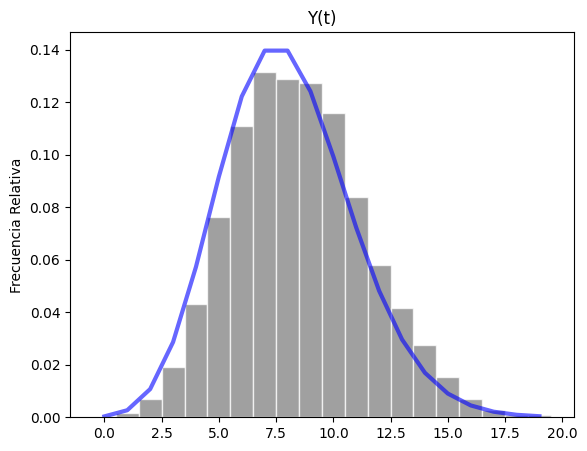

In [ ]:
plt.rcParams['figure.figsize'] = (6.5, 5)
x = range(20)

plt.plot(x, poisson.pmf(x,mu=par_lambda*S),'b-', lw=3, alpha=0.6, label='poison pmf')
plt.hist(Yt[40:], bins=np.arange(-0.5,20.5,1),  density=True, alpha=0.75, color='grey', edgecolor='white')  #remuevo los primeros 40
plt.xlabel('')
plt.ylabel('Frecuencia Relativa')
plt.title('Y(t)')
#plt.grid(True)
plt.show()

## Tiempo de servicio gamma

In [ ]:
from scipy.stats import gamma
salidas = llegadas +  gamma.rvs(a=5,scale=1/3, size=ns)

In [ ]:
llegadas_llav = np.hstack((llegadas.reshape(ns,1), np.full((ns,1),fill_value=1,dtype =float)))
salidas_llav = np.hstack((salidas.reshape(ns,1), np.full((ns,1),fill_value=-1,dtype =float)))
all_llav = np.concatenate((llegadas_llav,salidas_llav),axis=0)
all_llav = all_llav[all_llav[:, 0].argsort()]
all_llav_cut = all_llav[all_llav[:,0]<=t,:]
Yt = np.cumsum(all_llav_cut[:,1])

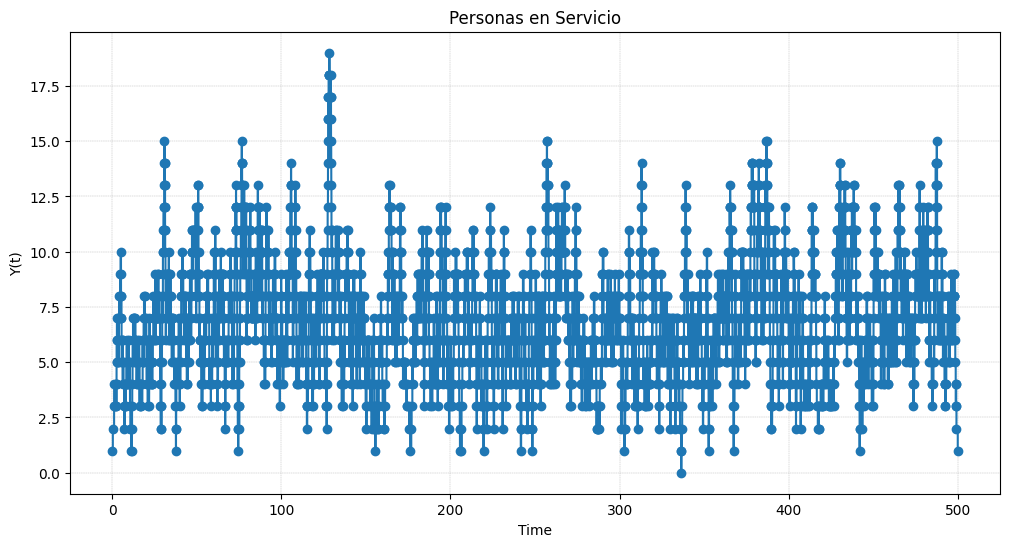

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.step(all_llav_cut[:,0], Yt, where='post')
plt.plot(all_llav_cut[:,0], Yt, 'C0o', alpha=1)
plt.grid(linestyle = '--', linewidth = 0.3)
plt.xlabel('Time')
plt.ylabel('Y(t)')
plt.title('Personas en Servicio')
plt.show()


### Comparamos con la distribución estacionaria



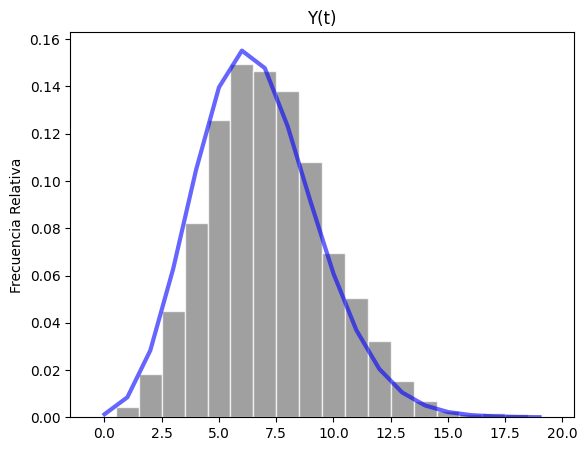

In [ ]:
plt.rcParams['figure.figsize'] = (6.5, 5)
x = range(20)

plt.plot(x, poisson.pmf(x,mu=par_lambda*5/3),'b-', lw=3, alpha=0.6, label='norm pdf')
plt.hist(Yt[30:], bins=np.arange(-0.5,20.5,1),  density=True, alpha=0.75, color='grey', edgecolor='white')  #remuevo los primeros
plt.xlabel('')
plt.ylabel('Frecuencia Relativa')
plt.title('Y(t)')
#plt.grid(True)
plt.show()

# Proceso Poisson Espacial $(\mathbb{R}^2)$

1. Establecer la region a simular (Ej $(0,t] \times (0,t]$)
2. Simular $n$ de $X(t) \sim $Pois($ \lambda t$)
3. Simular $n$ vaiid uniformes en $(0,t] \times (0,t]$


In [6]:
import random
from scipy.stats import uniform
from scipy.stats import poisson
import math
import matplotlib.pyplot as plt
import numpy as np

In [23]:
A = [[0,1],[0,2]]
par_lambda = 10

In [24]:
area_A = (A[0][1]-A[0][0])*(A[1][1]-A[1][0])
random.seed(50)
pois = poisson.rvs(mu=par_lambda * area_A, size=1)
pois

array([23])

In [25]:
 unifs_x = uniform.rvs(loc=A[0][0],scale=A[0][1]-A[0][0],size=pois)
 unifs_y = uniform.rvs(loc=A[1][0],scale=A[1][1]-A[1][0],size=pois)

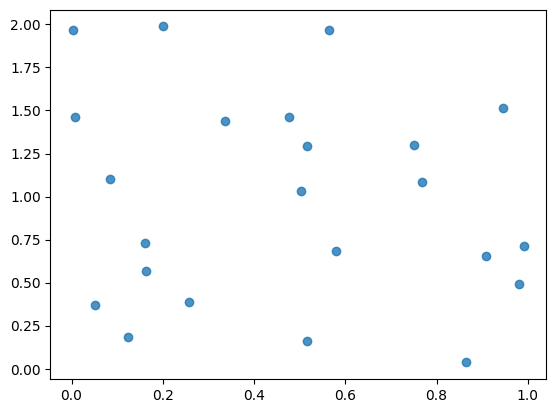

In [28]:
 plt.plot(unifs_x,unifs_y, 'C0o',alpha=0.8)
 plt.show()

# Proceso de Poisson no homogéneo

Código basado en
https://github.com/btel/python-in-neuroscience-tutorials/blob/master/poisson_process.ipynb y https://stackoverflow.com/questions/72970651/how-to-simulate-a-non-homogenous-poisson-process

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

%matplotlib inline

#import math
import random
from scipy.stats import uniform

In [33]:
# A frequency that cycles every 20 time units, in radians
OMEGA = 0.05 * 2 * np.pi

# A sinusoidal time-varying rate, truncated at zero
rate_f = lambda t: max(0, 4 - (16 * np.cos(OMEGA * t)))

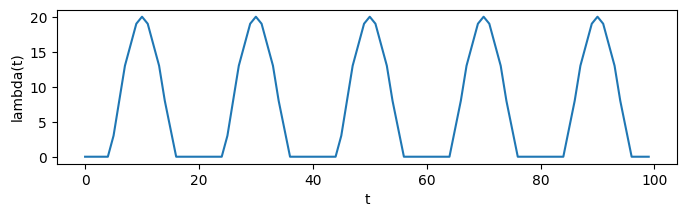

In [46]:
vrate = np.vectorize(rate_f)
#vrate(np.arange(0,100,.1))
plt.figure(figsize=(8, 2))
t = np.arange(0,100,1)
plt.plot(t, vrate(t))
plt.ylabel('lambda(t)')
plt.xlabel('t');

In [49]:
# The rate function above gives a maximum instantaneous arrival rate
# of 20 events per time unit, i.e., 4 - (16 * -1) when cos == -1
lambda_max = 20.0

In [77]:
t = 0.0
t_max = 100
t_homPP = []
t_non_homPP = []
print("time of event")
while t < t_max:
    # generate Poisson candidate event times using exponentially distributed
    # inter-event delays at the maximal rate
    t += random.expovariate(lambda_max)
    t_homPP.append(t)
    # (rate_f(t) / lambda_max) is the probability we
    # should accept a candidate at time t
    if random.random() <= rate_f(t) / lambda_max:
        #print(t)
        t_non_homPP.append(t)

time of event


Text(0.5, 0, 'time')

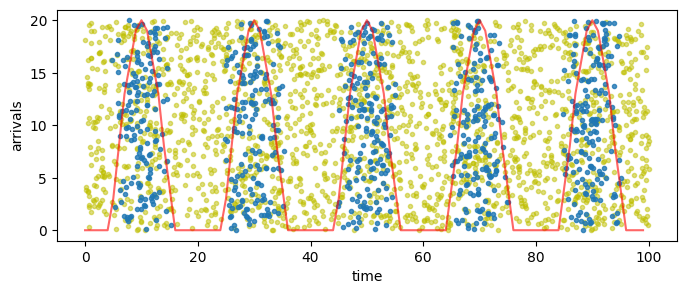

In [83]:
plt.figure(figsize=(8,3))
t = np.arange(0,100,1)
plt.plot(t_homPP,uniform.rvs(loc=0,scale=lambda_max,size=len(t_homPP)),'.y',alpha=.5)
plt.plot(t_non_homPP,uniform.rvs(loc=0,scale=lambda_max,size=len(t_non_homPP)),'.',alpha=.8)
plt.plot(t, vrate(t),'-r',alpha=0.6)
plt.ylabel('arrivals')
plt.xlabel('time')

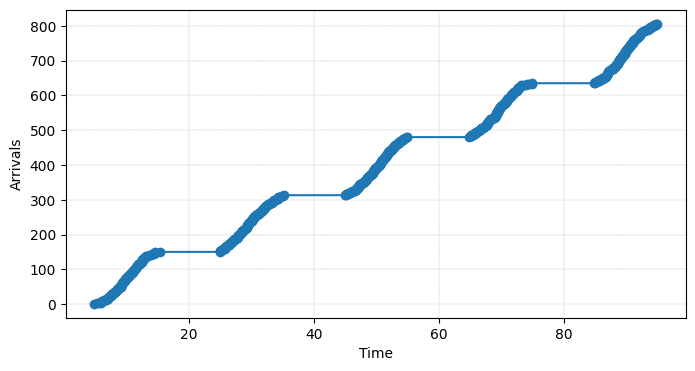

In [79]:
plt.figure(figsize=(8,4))
plt.step(t_non_homPP, np.arange(len(t_non_homPP))+1, where='post')
plt.plot(t_non_homPP, np.arange(len(t_non_homPP))+1, 'C0o', alpha=1)
plt.grid(linestyle = '--', linewidth = 0.3)
plt.xlabel('Time')
plt.ylabel('Arrivals')
plt.show()